In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

pd.options.display.max_rows = 999

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-11-21/rladies_chapters.csv")

In [10]:
df.head()

,id,chapter,title,date,location,year
0,296275584,rladies-st-louis,Save the date! Introduction to ChatGPT for R c...,2023-11-30,online,2023
1,296277517,rladies-coventry,An basic introduction: Python for R Users,2023-11-30,online,2023
2,295898711,rladies-baltimore,Holiday graphics and animations in R,2023-11-28,inperson,2023
3,296346610,rladies-philly,TidyTuesday with R-Ladies Philly!,2023-11-14,online,2023
4,296275461,rladies-st-louis,Save the date! Introduction to Network Analysi...,2023-11-08,online,2023


# Change in location over time (due to covid)

In [20]:
location = df.groupby(["year", "location"])["location"].agg(["count"]).reset_index()

<Axes: xlabel='year', ylabel='count'>

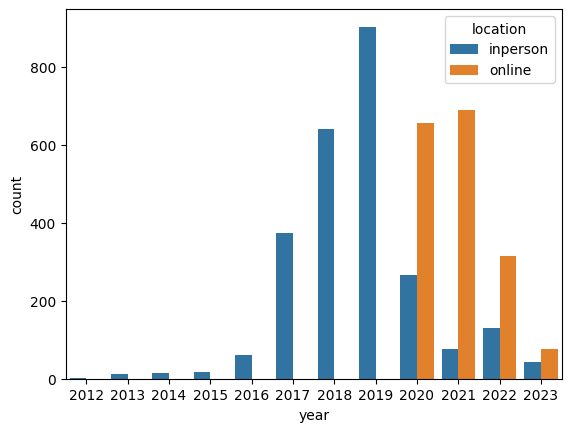

In [22]:
sns.barplot(x="year", y="count", hue="location", data=location)

# Closer look at how location changed for top 5 chapters by count

In [25]:
top_5_chapters = df.chapter.value_counts().head()

In [30]:
top_5_list = top_5_chapters.index.tolist()

In [32]:
filter_by_top_5 = df[df['chapter'].isin(top_5_list)]

In [33]:
top_5_locations = filter_by_top_5.groupby(["chapter", "year", "location"])["location"].agg(["count"]).reset_index()

In [38]:
top_5_locations.sort_values(by="year").reset_index(drop=True, inplace=True)

/home/yew/.local/share/virtualenvs/tidytuesday-IU8m_2cY/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


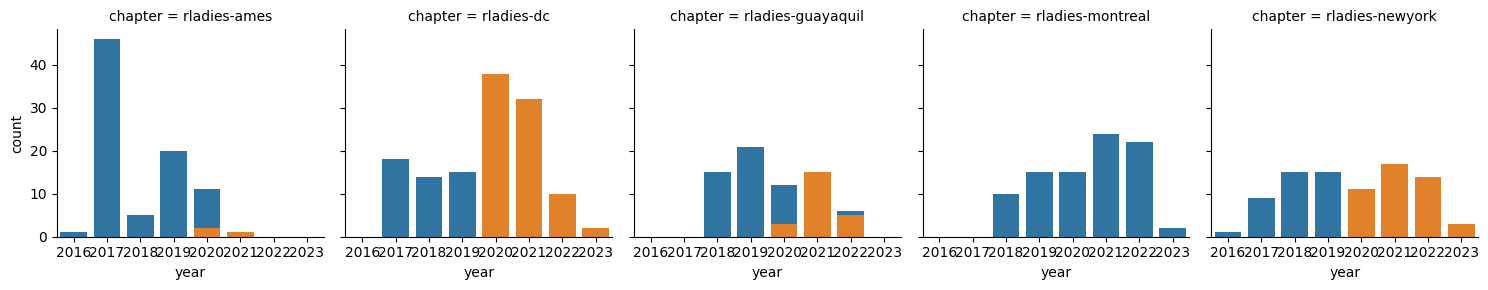

In [42]:
g = sns.FacetGrid(top_5_locations, col="chapter", hue="location")
g.map(sns.barplot, "year", "count")